Investigating stations by zoning type

Imports and useful constants

In [1]:
import geopandas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append("C:\\Users\\beezy\\git\\bluebikes_system_analysis\\code")
sys.path.append("C:\\Users\\beezy\\git\\bluebikes_system_analysis\\code\\data_handling")

# for loading station information
from data_handling.data_loading_methods import *

# useful crs constants
crs_lonlat = 'EPSG:4269'
crs_cartesian_feet = 'EPSG:2263'

Function definitions

Load data

In [2]:
# load data

# bluebike station data
stationdata = load_station_info()
# convert to a geodataframe
station_gdf = geopandas.GeoDataFrame(
    stationdata, geometry=geopandas.points_from_xy(stationdata['lon'], stationdata['lat']), crs=crs_lonlat)

# loading zoning subdistrict data
zoningdata = load_boston_zoning_data()
# zoningfile = r'C:\Users\beezy\git\bluebikes_system_analysis\data\city of boston datasets\Boston_Zoning_Subdistricts.zip'
# zoningdata = geopandas.read_file(zoningfile, crs=crs_lonlat)
# zoningdata = zoningdata.to_crs(crs_lonlat)
# zoningdata = zoningdata.rename(columns={'SUBDISTRIC':'Zone type'}) # renaming for clarity
# zoningdata = zoningdata.drop_duplicates() # remove any duplicate entries

In [3]:
zoningdata.explore('Zone type')

In [4]:
# zoningdata

In [5]:
# only keep stations in boston city limits

# city limits
citylimits = load_MA_citylimits()

# filter for stations in boston
bos_limits = citylimits.loc[ citylimits['TOWN'] == 'BOSTON' ]
is_inbos = station_gdf['geometry'].map(lambda x: bos_limits['geometry'].intersects(x).any() )
stations_inbos = station_gdf.loc[is_inbos]


In [6]:
stations_inbos.explore()

In [7]:
# Find what zone each station is in

stations_inbos['Zone type'] = np.repeat( '', len(stations_inbos.index) )

for index, station in stations_inbos.iterrows():
    
    # find all zones intersecting this station
    intersects_station = zoningdata.intersects( station['geometry'] )
    
    # get zone type
    stations_inbos.loc[index, 'Zone type'] = zoningdata.loc[ intersects_station, 'Zone type' ].values[0]

# end for

C:\anaconda39\envs\geo_env4\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
stations_inbos.explore('Zone type', marker_kwds={'radius':20})

In [14]:
# count zones and stations by zone type

# get zone types
zonetypes = zoningdata['Zone type'].unique()

# for each zone type, count # of zones and stations
zonecounts_byzone = [ np.sum( zoningdata['Zone type'] == zonetype ) for zonetype in zonetypes ]
zonecounts_bystation = [ np.sum( stations_inbos['Zone type'] == zonetype ) for zonetype in zonetypes ]

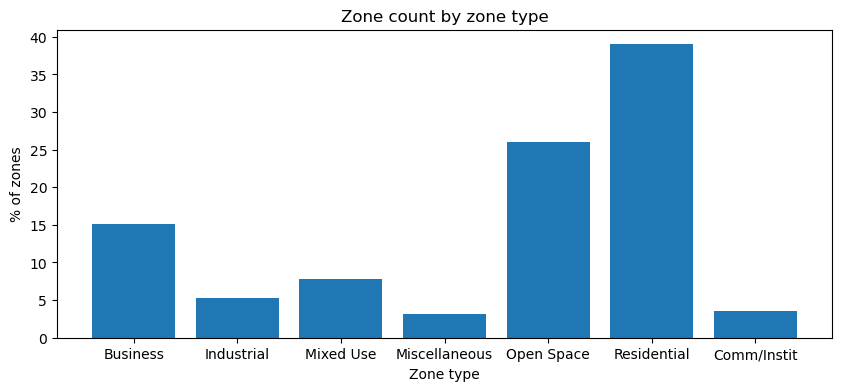

In [15]:
# bar plot of zone type counts by zone

fig, ax = plt.subplots(figsize =(10, 4))
ax.bar( x = zonetypes, 
        height = zonecounts_byzone/np.sum(zonecounts_byzone) * 100 )
 
plt.xlabel("Zone type")
plt.ylabel("% of zones")
plt.title('Zone count by zone type')
    
# Show plot
plt.show()

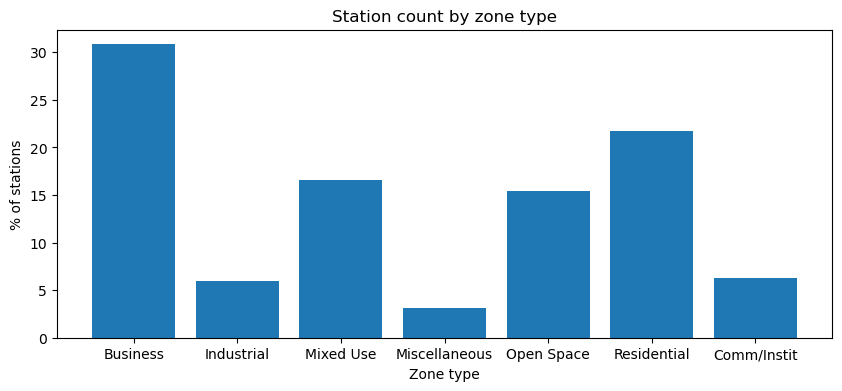

In [16]:
# bar plot of zone type counts by station

fig, ax = plt.subplots(figsize =(10, 4))
ax.bar( x = zonetypes, 
        height = zonecounts_bystation/np.sum(zonecounts_bystation) * 100 )
 
plt.xlabel("Zone type")
plt.ylabel("% of stations")
plt.title('Station count by zone type')
    
# Show plot
plt.show()

In [21]:
# calc and plot area of each zone type in perc of total area

zoneareas_bytype = [ np.sum( zoningdata.loc[ zoningdata['Zone type'] == zonetype, 'Shape__Are'] ) for zonetype in zonetypes ]

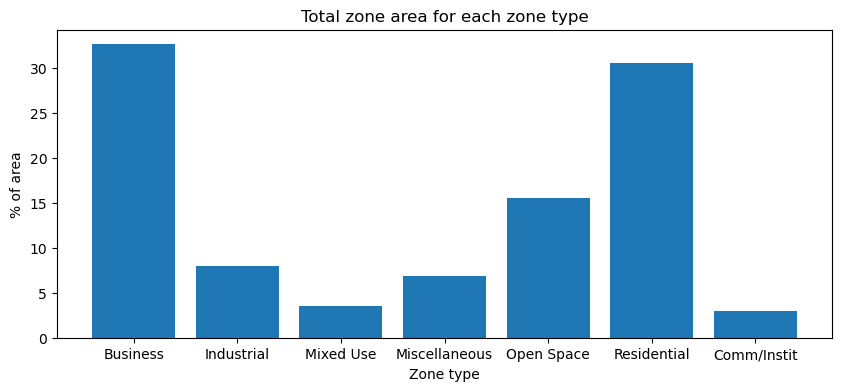

In [23]:
# bar plot of total zone area for each zone type

fig, ax = plt.subplots(figsize =(10, 4))
ax.bar( x = zonetypes, 
        height = zoneareas_bytype/np.sum(zoneareas_bytype) * 100 )
 
plt.xlabel("Zone type")
plt.ylabel("% of area")
plt.title('Total zone area for each zone type')
    
# Show plot
plt.show()